In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import json
from arcgis.features import FeatureLayer
import requests
import time
from matplotlib.ticker import FuncFormatter

# api call

In [94]:
# # remove everything after "FeatureServer/0" in the URL 
# url = "https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/SalaryData/FeatureServer/0"

# batch_size = 1000  # Number of records to retrieve per batch
# offset = 0  # Initial offset value
# data_list = []
# # ​Create the feature layer object
# feature_layer = FeatureLayer(url)

# while True:
#     # Query the feature layer with pagination
#     query_result = feature_layer.query(where='1=1', out_fields='*', return_geometry=False, result_offset=offset, result_record_count=batch_size)
    
#     # Retrieve the features from the query result
#     features = query_result.features
    
#     # Process the data for the current batch
#     for feature in features:
#         data_list.append(feature.attributes)
    
#     # Break the loop if the response is empty or the desired number of records is reached
#     if len(features) == 0 or len(data_list) >= 1000:
#         break
    
#     # Increment the offset by the batch size
#     offset += batch_size
# # Create a DataFrame from the data list
# df = pd.DataFrame(data_list)

# df.to_csv('sal.csv')


# Functions

In [95]:
# functions


def OT(year):
    df_filtered = df[df['CalYear'] == year]
    df_filtered = df_filtered[df_filtered['Overtime_Rate'] > df_filtered['Regular_Rate']]
    # df_filtered = df_filtered.sort_values(by='YTD_Total', ascending=False)
    return df_filtered

def Dep_yearly(year):
    pd.options.display.float_format = '{:.2f}'.format
    department = df[df['CalYear'] == year]
    department = department.groupby(['CalYear', 'Department'])['YTD_Total'].sum().reset_index()
    department = department.sort_values(by='YTD_Total', ascending=False)
    department.head()
    return department

def process_salary_data(url):
    df = pd.read_csv(url)
    df['Hr_Rate'] = df['Regular_Rate'] / 2080
    df['Ot_Rate'] = df['Hr_Rate'] * 1.5
    df['Hr_Worked'] = df['Overtime_Rate'] / df['Ot_Rate'] / 52 + 40
    df = df.sort_values(by='Hr_Worked', ascending=False)
    return df

data_url = "https://raw.githubusercontent.com/dmorton714/2023_lmg_sal/main/data/ot_added_all.csv"
df = process_salary_data(data_url)
df

def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

def a_dep(df):
    ax = df.plot.bar(x='Department')
    ax.legend_ = None
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    plt.gcf().set_size_inches(10, 6)
    plt.ylabel('Millions USD')
    plt.title('Annual Salary Spend by Department')
    plt.show()

def OT_E(dataframe):
    top_20 = dataframe.head(20)
    top_20.plot.bar(x='Employee_Name', y='Hr_Worked')
    plt.xticks()
    plt.xlabel('Employee Name')
    plt.ylabel('Hours Worked')
    plt.title('Top 15 Employees by Hours Worked')
    plt.show()

def plot_department_counts(dataframe):
    department_counts = dataframe['Department'].value_counts()
    department_counts.plot(kind='bar')
    plt.xlabel('Department')
    plt.ylabel('Count')
    plt.title('Number of Employees working more than 60hrs by department')
    plt.show()

# 2023

In [96]:
# now reading locally
data_url = "sal.csv"
df = process_salary_data(data_url)
df.head(1)
df.to_csv('ot_added_all.csv')

In [97]:
a23 = Dep_yearly(2023)
a23.head(3)

,CalYear,Department,YTD_Total
21,2023,Louisville Metro Police Department,102686459.12
19,2023,Louisville Fire,35979366.34
7,2023,Department of Corrections,25767736.48


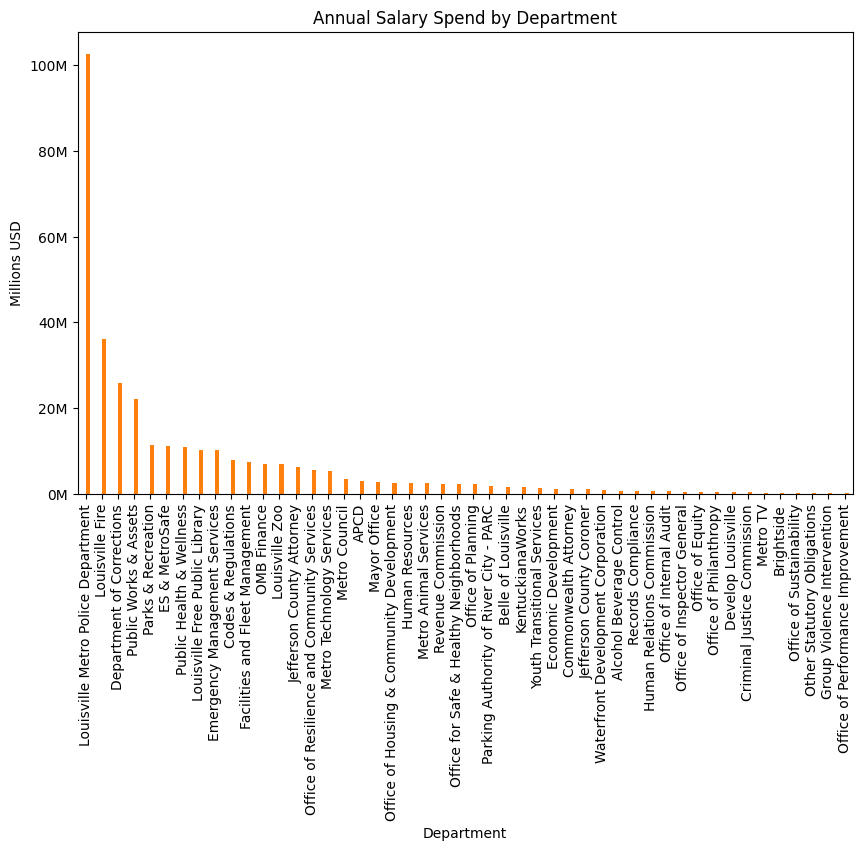

In [98]:
a_dep(a23)

In [99]:
df23 = OT(2023)
df23.head()

,Unnamed: 0,CalYear,Employee_Name,Department,jobTitle,Annual_Rate,Regular_Rate,Overtime_Rate,Incentive_Allowance,Other,YTD_Total,ObjectId,Hr_Rate,Ot_Rate,Hr_Worked
5394,5394,2023,"Watson, Danny W",Parks & Recreation,Golf Operations Supervisor I,44075.20,0.00,84.76,0.00,NaN,1168.86,5395,0.00,0.00,inf
2764,2764,2023,"Ingram, Lydia Ann",Louisville Metro Police Department,LMPD Service Center Technician,41995.20,0.00,151.43,0.00,NaN,151.43,2765,0.00,0.00,inf
416,416,2023,"Murphy, Paul P.",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,34461.45,82478.46,33142.55,NaN,150082.46,417,16.57,24.85,103.82
2157,2157,2023,"Herndon, Adam B",Louisville Fire,Fire Company Commander 56hr,76896.77,35518.26,80961.60,25453.80,NaN,142419.42,2158,17.08,25.61,100.78
220,220,2023,"Hudson, Daryell W",Louisville Fire,Fire Apparatus Operator 56hr,67362.05,25227.89,51028.06,21927.44,NaN,107718.33,221,12.13,18.19,93.94


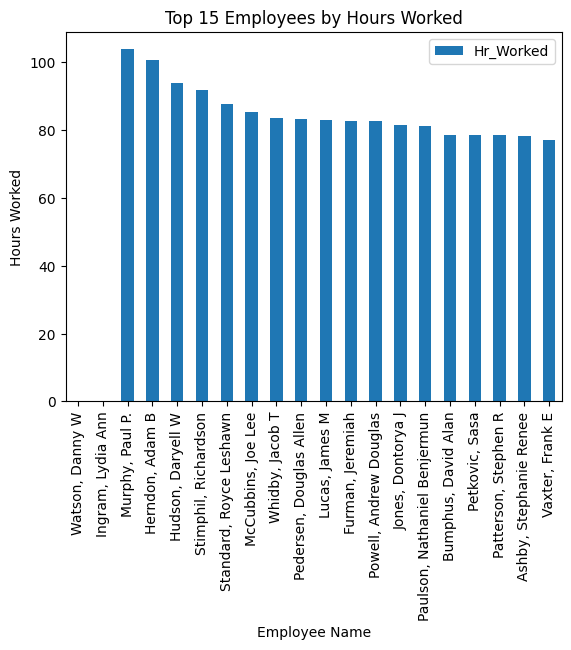

In [100]:
OT_E(df23)

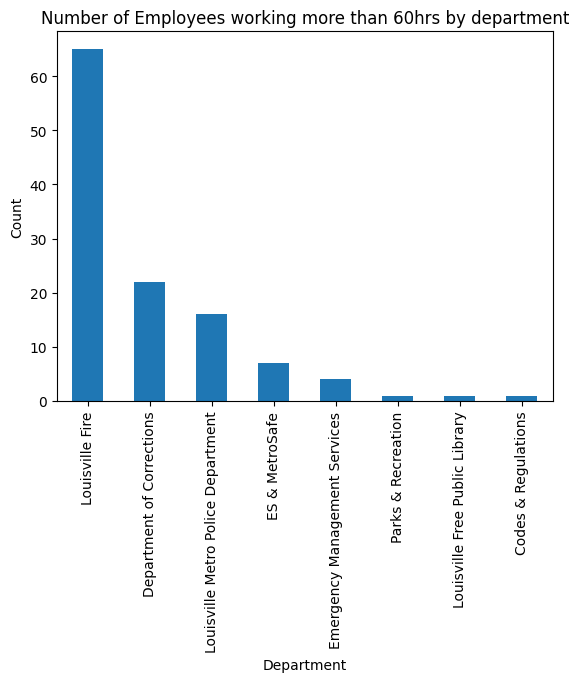

In [101]:
plot_department_counts(df23)